# Simple Linear Regression

>Method-1 is basic 
>
>Method-2 has 95 percent accuracy
>
>Method-3 based on visulization has 95.7 accuracy

## Method-1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets\Salary_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Dell\AppData\Local\Temp\ipykernel_4652\701592314.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("Datasets\Salary_dataset.csv")
C:\Users\Dell\AppData\Local\Temp\ipykernel_4652\701592314.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("Datasets\Salary_dataset.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Datasets\\Salary_dataset.csv'

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


c:\Users\hulkh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hulkh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


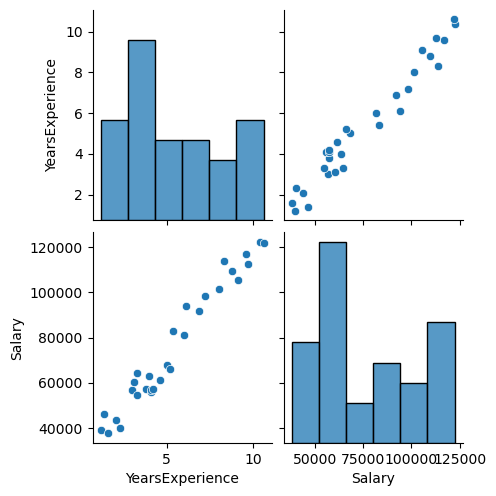

In [6]:
sns.pairplot(df)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

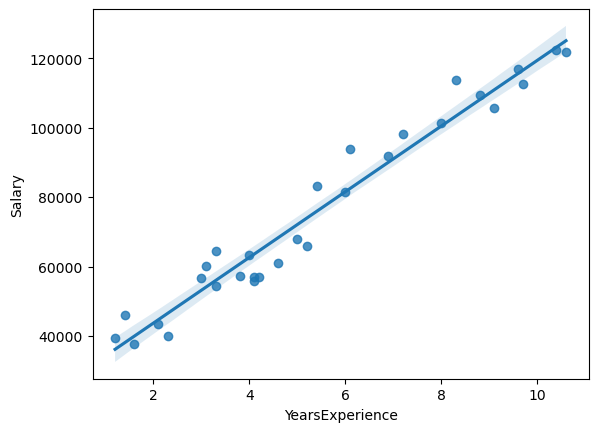

In [7]:
sns.regplot(x = "YearsExperience", y= "Salary", data=df)

In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [13]:
X = df.iloc[:,:1]
y = df.iloc[:,1:]

In [14]:
X.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [15]:
y.head()

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.25,random_state=42,)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
X_train

array([[ 2.0765167 ],
       [ 0.56579247],
       [-0.90410137],
       [-0.61828868],
       [-0.37330637],
       [ 0.2391494 ],
       [-0.98576214]])

In [20]:
X_test

array([[ 1.49634422],
       [-0.13260654],
       [ 1.01112485],
       [ 0.00602757],
       [-0.72180149],
       [-0.54850886],
       [ 1.73895391],
       [ 1.18441748],
       [-0.44453328],
       [-1.44963055],
       [-1.06838676],
       [-0.06328948],
       [-0.82577707],
       [-0.40987475],
       [-0.44453328],
       [ 0.90714926],
       [-1.3803135 ],
       [-1.31099645],
       [ 1.28839306],
       [-1.13770381],
       [ 0.62988105],
       [ 1.46168569],
       [ 0.21397873]])

In [21]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [22]:
regression.fit(X_train,y_train)

LinearRegression()

In [23]:
from sklearn.metrics import make_scorer, mean_squared_error

# Create a custom scorer for negative mean squared error
neg_mean_squared_error = make_scorer(mean_squared_error, greater_is_better=False)

In [24]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring= neg_mean_squared_error,cv = 4)

In [25]:
validation_score

array([-2.13007486e+08, -1.78291398e+07, -9.76589962e+07, -3.40994281e+07])

In [26]:
np.mean(validation_score)

-90648762.44245456

In [27]:
Y_pred = regression.predict(X_test)

In [28]:
Y_pred

array([[111634.30503383],
       [ 75094.12014087],
       [100749.99464018],
       [ 78203.92311048],
       [ 61877.45752001],
       [ 65764.71123202],
       [117076.46023065],
       [104637.2483522 ],
       [ 68097.06345924],
       [ 45550.99192954],
       [ 54102.95009597],
       [ 76649.02162567],
       [ 59545.1052928 ],
       [ 68874.51420164],
       [ 68097.06345924],
       [ 98417.64241297],
       [ 47105.89341434],
       [ 48660.79489915],
       [106969.60057941],
       [ 52548.04861117],
       [ 92198.03647374],
       [110856.85429142],
       [ 82868.6275649 ]])

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
mse=mean_squared_error(y_test,Y_pred)
mae=mean_absolute_error(y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

62724563.22545467
6754.242801759235
7919.884041162135


In [31]:
X_test

array([[ 1.49634422],
       [-0.13260654],
       [ 1.01112485],
       [ 0.00602757],
       [-0.72180149],
       [-0.54850886],
       [ 1.73895391],
       [ 1.18441748],
       [-0.44453328],
       [-1.44963055],
       [-1.06838676],
       [-0.06328948],
       [-0.82577707],
       [-0.40987475],
       [-0.44453328],
       [ 0.90714926],
       [-1.3803135 ],
       [-1.31099645],
       [ 1.28839306],
       [-1.13770381],
       [ 0.62988105],
       [ 1.46168569],
       [ 0.21397873]])

In [32]:
X_test.shape

(23, 1)

In [33]:
X_test.shape[1]

1

In [34]:
X_test.shape[0]

23

In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test,Y_pred)
score

0.9199022817107106

In [36]:
Adj_score = 1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_score

0.9160881046493159

In [37]:
#OLS regression
import statsmodels.api as sm

In [38]:
model = sm.OLS(y_train,X_train)

In [39]:
model

In [40]:
model.fit()

In [41]:
model = sm.OLS(y_train,X_train).fit()
model

In [42]:
prediction = model.predict(X_test)
prediction

array([ 33565.59074811,  -2974.59414485,  22681.28035447,    135.20882477,
       -16191.25676571, -12304.00305369,  39007.74594494,  26568.53406648,
        -9971.65082648, -32517.72235618, -23965.76418974,  -1419.69266004,
       -18523.60899292,  -9194.20008408,  -9971.65082648,  20348.92812726,
       -30962.82087137, -29407.91938657,  28900.88629369, -25520.66567455,
        14129.32218803,  32788.14000571,   4799.91327919])

In [43]:
model.summary()

c:\Users\hulkh\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.076
Model:                            OLS   Adj. R-squared (uncentered):             -0.078
Method:                 Least Squares   F-statistic:                             0.4928
Date:                Sat, 27 Jul 2024   Prob (F-statistic):                       0.509
Time:                        08:58:05   Log-Likelihood:                         -88.808
No. Observations:                   7   AIC:                                      179.6
Df Residuals:                       6   BIC:                                      179.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.243e+04    3.2e+04      0.702      0.509   -5.58e+04    1.01e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.012
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.275
Skew:                           0.433   Prob(JB):                        0.872
Kurtosis:                       2.562   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
## Prediction For new data
regression.predict(scaler.transform([[24]]))

c:\Users\hulkh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[222809.76119752]])

## Methods - 2
> It has the greater accuracy

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
salary = pd.read_csv("Datasets\Salary_dataset.csv")
salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
salary.drop(columns="Unnamed: 0" , inplace=True)
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
len(salary)

30

In [9]:
salary.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [8]:
salary[salary.duplicated()]

,YearsExperience,Salary


In [6]:
len(salary[salary.duplicated()])

0

In [11]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

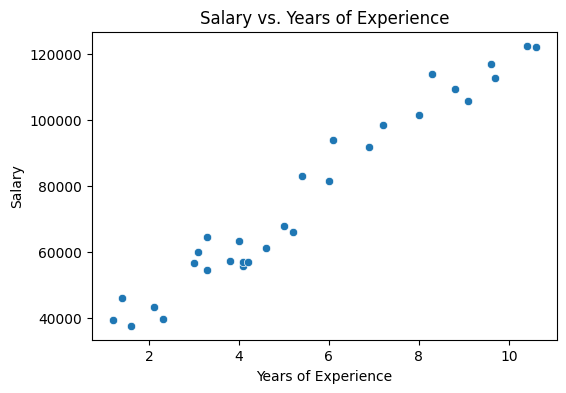

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='YearsExperience', y='Salary', data=salary)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
salary = (salary - salary.min()) / (salary.max() - salary.min())
salary.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


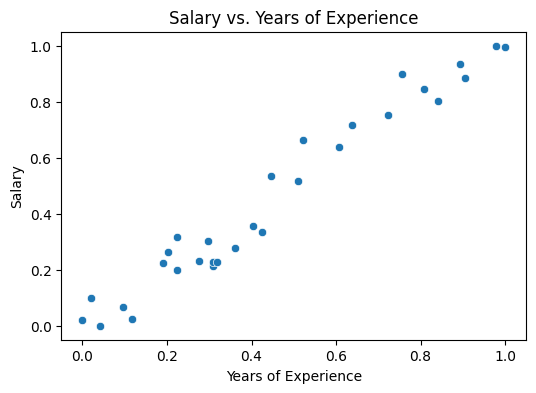

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='YearsExperience', y='Salary', data=salary)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
X = salary[['YearsExperience']]
y = salary['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

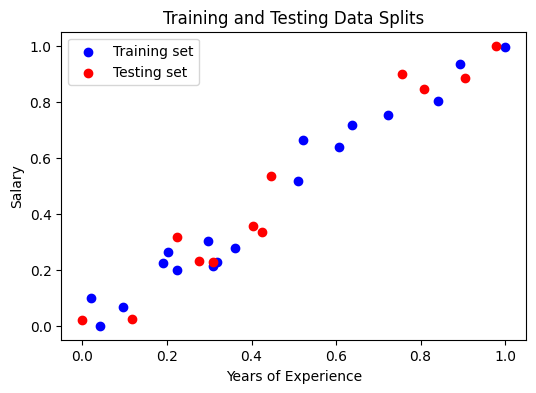

In [20]:
plt.figure(figsize=(6, 4))

# Plot training set
plt.scatter(X_train, y_train, color='blue', label='Training set')

# Plot testing set
plt.scatter(X_test, y_test, color='red', label='Testing set')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Training and Testing Data Splits')
plt.legend()
plt.show()

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

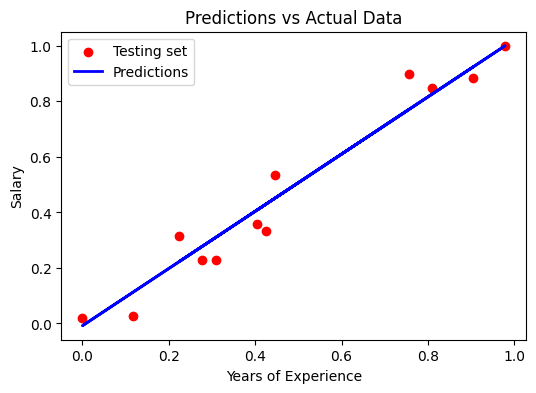

In [24]:
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 4))

# Plot testing set
plt.scatter(X_test, y_test, color='red', label='Testing set')

# Plot predictions
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predictions')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Predictions vs Actual Data')
plt.legend()
plt.show()



In [25]:
r2 = r2_score(y_test, y_pred)
r2

0.9532338376280693

## Method -3

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')

In [35]:
def combinedplot(data, label, binwidth, figsize = (6, 6)):
    """
    Plot a combined `boxplot`, `histplot` and `rugplot` over the `data[label]`.

    Parameters
    ----------
    data : pd.DataFrame()
           data source to plot
    label : str
            designated label in `data` to plot
    binwidth : float, optional
               `binwidth` in `sns.histplot`
    figsize : tuple, default:(6, 6)
    """
    # initialize figure and axes
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=figsize, sharex='col', 
                                          gridspec_kw={"height_ratios": (.15, .85)})
    
    # boxplot
    sns.boxplot(data=data, x=label, ax=ax_box, color='crimson')

    # histplot
    sns.histplot(data=data, x=label, ax=ax_hist, binwidth=binwidth)

    # rugplot
    sns.rugplot(data=data, x=label, ax=ax_hist, height=0.05, color='gold', lw=2.)
      
    plt.tight_layout()
    
    return None

In [29]:
data = pd.read_csv("Datasets\Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [31]:
data['Salary'] = data['Salary']/1000.
data.drop(columns=['Unnamed: 0'], inplace=True)
data.rename(columns={"YearsExperience": 'Experience (years)', 
             'Salary': 'Salary (1000 $)'}, inplace=True)
data.head()

,Experience (years),Salary (1000 $)
0,1.2,39.344
1,1.4,46.206
2,1.6,37.732
3,2.1,43.526
4,2.3,39.892


In [30]:
print(f'Value counts: {data.isnull().value_counts()}\n\nData shape: {data.shape}')

Value counts: Unnamed: 0  YearsExperience  Salary
False       False            False     30
Name: count, dtype: int64

Data shape: (30, 3)


In [32]:
data.describe()

,Experience (years),Salary (1000 $)
count,30.000000,30.00000
mean,5.413333,76.00400
std,2.837888,27.41443
min,1.200000,37.73200
25%,3.300000,56.72175
50%,4.800000,65.23800
75%,7.800000,100.54575
max,10.600000,122.39200


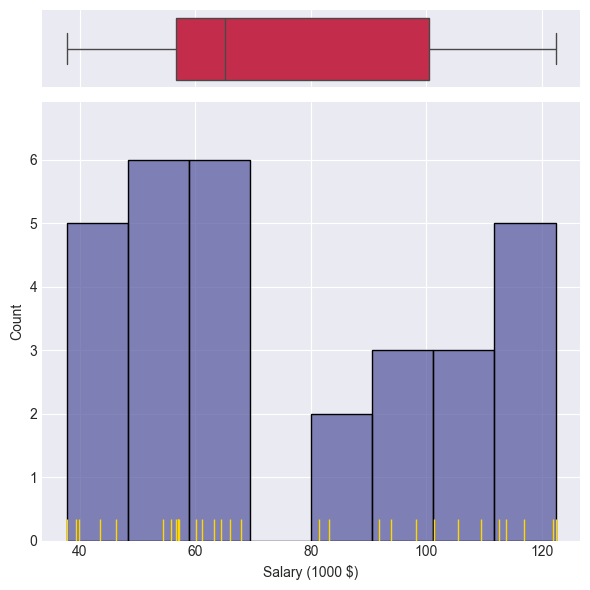

In [38]:
combinedplot(data, 'Salary (1000 $)', binwidth=10.)

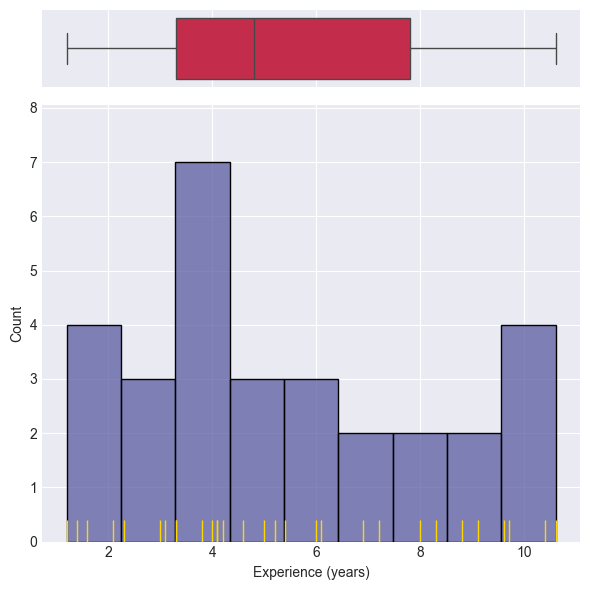

In [39]:
combinedplot(data, 'Experience (years)', binwidth=1.)

In [40]:
data.corr()

,Experience (years),Salary (1000 $)
Experience (years),1.000000,0.978242
Salary (1000 $),0.978242,1.000000


<Axes: xlabel='Experience (years)', ylabel='Salary (1000 $)'>

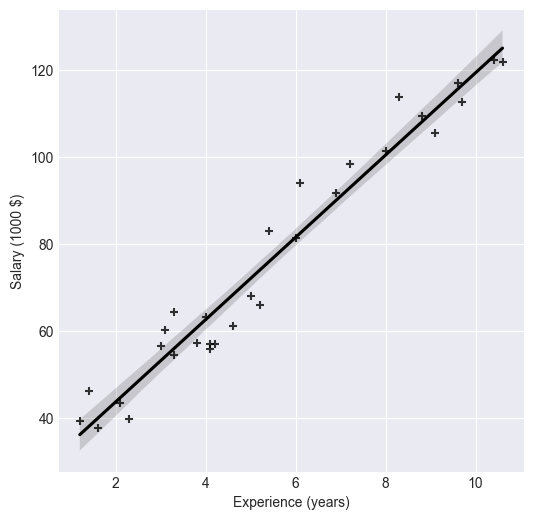

In [41]:
fig = plt.figure(figsize=(6, 6))

sns.regplot(data=data, 
            x='Experience (years)', 
            y='Salary (1000 $)', 
            color='k', marker='+')

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = np.array(data['Salary (1000 $)']).reshape((-1, 1))
y = np.array(data['Experience (years)']).reshape((-1, 1))

model.fit(x, y)
print(f'Linear regression R2 value: {model.score(x, y):3.3f}')

Linear regression R2 value: 0.957
